<a href="https://colab.research.google.com/github/oerv13/Ibero/blob/main/Copia_de_Exploraci%C3%B3n_visual_y_diagn%C3%B3stico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Selección del dataset**

Se toma la base de datos de unas pruebas realizadas en el ambiente de test para el proceso Nacha, estos datos no son productivos, son simulados para la validacion de todo el proceso.   

**2. Configuración del entorno**

In [1]:
import pandas as pd # Proporciona DataFrames y Series para la manipulación, limpieza, transformación y análisis eficiente de datos tabulares.
import matplotlib.pyplot as plt # Es la librería base para crear gráficos estáticos, interactivos y de alta calidad para la visualización de datos
import seaborn as sns # Construida sobre Matplotlib, ofrece una interfaz de alto nivel para dibujar gráficos estadísticos informativos y atractivos.
import numpy as np # La librería fundamental para el cálculo numérico, proporcionando arrays y matrices N-dimensionales y funciones matemáticas de alto rendimiento.


**3. Carga y exploración inicial de los datos**

In [2]:
#Define la ruta del archivo
file_path = '/content/sample_data/Nacha3.csv'

#Carga el archivo CSV en un DataFrame
try:
  df_housing = pd.read_csv(file_path)
  print ("El dataframe cargado con exito")
except FileNotFoundError:
    print (f"Error al cargar el archivo: {file_path}")
    df_housing = None #Validar carga

#df = pd.read_csv('/content/sample_data/ArcNachas (1).csv')
#df.head()

/tmp/ipython-input-3862667840.py:6: DtypeWarning: Columns (7,8,12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_housing = pd.read_csv(file_path)


El dataframe cargado con exito


In [3]:
# Visualizacion de la data cargada desde el DataSet
df_housing

,TRANSACTION_ID,RANGOFECHA,CODTRANSAC,IDENTIDADDESTINO,NAMEENTIDADDESTINO,IDENTIDADORIGEN,NAMEENTIDADORIGEN,IDDESTINATARIO,CTADESTINO,NOMDESTINATARIO,VALORTRANSAC,NUMRASTREO,CODRESP,VALORTRANSAC_1,TIPOTRANSACCION,IDORIGINADOR,DATAADDITIONAL,NAMEORIGINADOR,OBSERVACION
0,355330042,08/08/24 07:57:06.859000000,27,10061,Banco de Bogota,10016,Banco de Bogota,NaN,406030188608,MENAJE SA,103000.0,10011012103,NaN,1.030000e+05,Debito,9002449962,014444555,Colegio Uno,TARCREDITO
1,355330051,08/08/24 08:22:48.259000000,27,10061,Banco de Bogota,10016,Banco de Bogota,890301886.0,406030188608,MENAJE SA @,107000.0,10011012107,NaN,1.070000e+05,Debito,9002449962,014444555,Colegio Uno,TARCREDITO
2,355330059,08/08/24 08:44:33.792000000,36,10061,Banco de Bogota,10016,Banco de Bogota,890301886.0,406030188608,MENAJE SA,1223400.0,10012012109,R04,1.223400e+06,Debito,9002449962,014444555,Colegio Uno,DEVOLUCION
3,355330061,08/08/24 08:51:43.153000000,27,10139,Banco de Bogota,10016,Banco de Bogota,890301886.0,406030188608,MENAJE SA,43100.0,10011012043,NaN,4.310000e+04,Debito,9002449962,014444555,Colegio Uno,TARCREDITO
4,355330069,08/08/24 09:13:56.261000000,37,10061,Banco de Bogota,10016,Banco de Bogota,890301886.0,406030188608,MENAJE SA,112000.0,10011012112,NaN,1.120000e+05,Debito,9002449962,014444555,Colegio Uno,TARCREDITO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858695,270368842,02/08/23 15:45:26.919000000,22,10016,Banco de Bogota,10139,BBVA Colombia,890301886,406030188608,MENAJE SA,5884100.0,100010510058841,NaN,2.000010e+12,Credito,9002449962,14444555,Colegio Uno,TRASLADOS
858696,270368843,02/08/23 15:45:26.919000000,22,10016,Banco de Bogota,10139,BBVA Colombia,890301886,406030188608,MENAJE SA,5884200.0,100010510058842,NaN,2.000010e+12,Credito,9002449962,14444555,Colegio Uno,TRASLADOS
858697,270368846,02/08/23 15:45:26.919000000,22,10016,Banco de Bogota,10139,BBVA Colombia,890301886,406030188608,MENAJE SA,5884500.0,100010510058845,NaN,2.000010e+12,Credito,9002449962,14444555,Colegio Uno,TRASLADOS
858698,270368847,02/08/23 15:45:26.919000000,22,10016,Banco de Bogota,10139,BBVA Colombia,890301886,406030188608,MENAJE SA,5884600.0,100010510058846,NaN,2.000010e+12,Credito,9002449962,14444555,Colegio Uno,TRASLADOS


In [4]:
df_housing.head()

,TRANSACTION_ID,RANGOFECHA,CODTRANSAC,IDENTIDADDESTINO,NAMEENTIDADDESTINO,IDENTIDADORIGEN,NAMEENTIDADORIGEN,IDDESTINATARIO,CTADESTINO,NOMDESTINATARIO,VALORTRANSAC,NUMRASTREO,CODRESP,VALORTRANSAC_1,TIPOTRANSACCION,IDORIGINADOR,DATAADDITIONAL,NAMEORIGINADOR,OBSERVACION
0,355330042,08/08/24 07:57:06.859000000,27,10061,Banco de Bogota,10016,Banco de Bogota,NaN,406030188608,MENAJE SA,103000.0,10011012103,NaN,103000.0,Debito,9002449962,014444555,Colegio Uno,TARCREDITO
1,355330051,08/08/24 08:22:48.259000000,27,10061,Banco de Bogota,10016,Banco de Bogota,890301886.0,406030188608,MENAJE SA @,107000.0,10011012107,NaN,107000.0,Debito,9002449962,014444555,Colegio Uno,TARCREDITO
2,355330059,08/08/24 08:44:33.792000000,36,10061,Banco de Bogota,10016,Banco de Bogota,890301886.0,406030188608,MENAJE SA,1223400.0,10012012109,R04,1223400.0,Debito,9002449962,014444555,Colegio Uno,DEVOLUCION
3,355330061,08/08/24 08:51:43.153000000,27,10139,Banco de Bogota,10016,Banco de Bogota,890301886.0,406030188608,MENAJE SA,43100.0,10011012043,NaN,43100.0,Debito,9002449962,014444555,Colegio Uno,TARCREDITO
4,355330069,08/08/24 09:13:56.261000000,37,10061,Banco de Bogota,10016,Banco de Bogota,890301886.0,406030188608,MENAJE SA,112000.0,10011012112,NaN,112000.0,Debito,9002449962,014444555,Colegio Uno,TARCREDITO


In [5]:
# Atributos de exploración de los df
if df_housing is not None:
  print(df_housing.head(10))


   TRANSACTION_ID                   RANGOFECHA  CODTRANSAC  IDENTIDADDESTINO  \
0       355330042  08/08/24 07:57:06.859000000          27             10061   
1       355330051  08/08/24 08:22:48.259000000          27             10061   
2       355330059  08/08/24 08:44:33.792000000          36             10061   
3       355330061  08/08/24 08:51:43.153000000          27             10139   
4       355330069  08/08/24 09:13:56.261000000          37             10061   
5       355330070  08/08/24 09:13:56.261000000          37             10061   
6       355330300  09/08/24 10:58:37.813000000          32             10139   
7       320320068  29/01/24 15:41:31.658000000          37             10061   
8       320320051  29/01/24 14:45:31.928000000          32             10139   
9       320320034  29/01/24 10:11:15.972000000          27             10139   

  NAMEENTIDADDESTINO  IDENTIDADORIGEN NAMEENTIDADORIGEN IDDESTINATARIO  \
0    Banco de Bogota            10016   Banco

In [6]:
# Información general del dataset
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858700 entries, 0 to 858699
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TRANSACTION_ID      858700 non-null  int64  
 1   RANGOFECHA          858700 non-null  object 
 2   CODTRANSAC          858700 non-null  int64  
 3   IDENTIDADDESTINO    858700 non-null  int64  
 4   NAMEENTIDADDESTINO  858700 non-null  object 
 5   IDENTIDADORIGEN     858700 non-null  int64  
 6   NAMEENTIDADORIGEN   858700 non-null  object 
 7   IDDESTINATARIO      858692 non-null  object 
 8   CTADESTINO          858700 non-null  object 
 9   NOMDESTINATARIO     858530 non-null  object 
 10  VALORTRANSAC        858700 non-null  float64
 11  NUMRASTREO          858700 non-null  int64  
 12  CODRESP             1129 non-null    object 
 13  VALORTRANSAC_1      858689 non-null  float64
 14  TIPOTRANSACCION     858700 non-null  object 
 15  IDORIGINADOR        858700 non-nul

In [7]:
# Estadísticas descriptivas
df_housing.describe()

,TRANSACTION_ID,CODTRANSAC,IDENTIDADDESTINO,IDENTIDADORIGEN,VALORTRANSAC,NUMRASTREO,VALORTRANSAC_1,IDORIGINADOR
count,8.587000e+05,858700.000000,858700.000000,858700.000000,8.587000e+05,8.587000e+05,8.586890e+05,8.587000e+05
mean,2.585337e+08,24.667421,10040.396638,10121.337962,3.995570e+10,7.298652e+13,1.499501e+12,7.108738e+09
std,1.450194e+07,4.488863,104.878746,29.155258,1.403089e+13,4.440853e+13,1.405492e+13,3.149556e+09
min,1.465263e+08,21.000000,10016.000000,10016.000000,0.000000e+00,1.001000e+10,0.000000e+00,5.459300e+04
25%,2.603426e+08,22.000000,10016.000000,10074.000000,5.000000e+01,1.007011e+10,1.000000e+05,1.989668e+09
50%,2.605573e+08,22.000000,10016.000000,10139.000000,5.770700e+06,1.000105e+14,2.000010e+12,9.002450e+09
75%,2.607720e+08,32.000000,10074.000000,10139.000000,1.290532e+07,1.000105e+14,2.000010e+12,9.002450e+09
max,3.803300e+08,57.000000,18885.000000,10139.000000,5.200000e+15,1.000105e+14,5.200000e+15,9.018413e+09


In [8]:
# Ver cantidad de valores nulos por columna
df_housing.isnull().sum()

,0
TRANSACTION_ID,0
RANGOFECHA,0
CODTRANSAC,0
IDENTIDADDESTINO,0
NAMEENTIDADDESTINO,0
IDENTIDADORIGEN,0
NAMEENTIDADORIGEN,0
IDDESTINATARIO,8
CTADESTINO,0
NOMDESTINATARIO,170


In [9]:
# Ver cantidad de valores duplicados
df_housing.duplicated().sum()

np.int64(0)

Se revisan los valores faltantes para identificar posibles problemas de calidad de datos.

Dependiendo del volumen y relevancia de los nulos, se decide si se eliminan filas, se imputan valores o se dejan tal cual. En un contexto financiero, es preferible no imputar montos o códigos críticos sin criterio sólido, por lo que se opta por eliminar solo registros claramente incompletos.

In [11]:
# Eliminamos filas con valores faltantes (si la cantidad es baja).
# Si hubiera muchos nulos, aquí se justificaría otra estrategia de imputación.
df =  df_housing.dropna()
print("Dimensiones después de eliminar nulos:", df.shape)

Dimensiones después de eliminar nulos: (1009, 19)


Se identifican outliers en el campo de monto. En el contexto de transacciones financieras, los valores extremos pueden corresponder a operaciones de alto valor o a errores de digitación.
En este proyecto, se asume que los montos extremos son relevantes para la detección de anomalías, por lo que no se eliminan, pero sí se normalizan para evitar que dominen el entrenamiento de los modelos.

In [12]:
# Media y Mediana por NAMEENTIDADORIGEN y VALORTRANSAC
pd.set_option('display.float_format', '{:.2f}'.format)

mediana = df_housing.groupby('NAMEENTIDADORIGEN')['VALORTRANSAC'].median()
media = df_housing.groupby('NAMEENTIDADORIGEN')['VALORTRANSAC'].mean()
mediana

,VALORTRANSAC
NAMEENTIDADORIGEN,
BBVA Colombia,9556700.00
Banco de Bogota,1117400000.00
Bancolombia,1.00
Citibank,19100.00
Itau,89700.00


Se identifican outliers en el campo de monto. En el contexto de transacciones financieras, los valores extremos pueden corresponder a operaciones de alto valor o a errores de digitación.
En este proyecto, se asume que los montos extremos son relevantes para la detección de anomalías, por lo que no se eliminan, pero sí se normalizan para evitar que dominen el entrenamiento de los modelos.

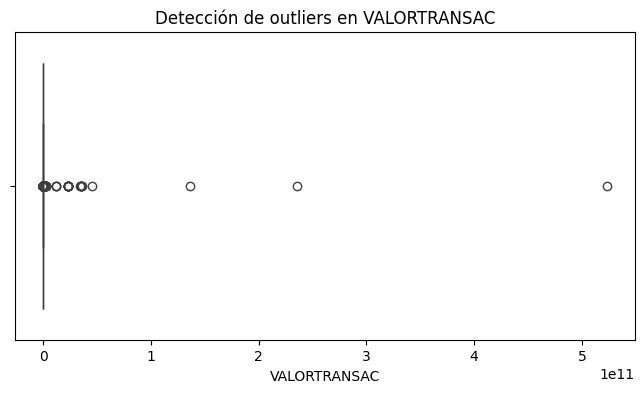

In [13]:
# ============================================
# 3.3 Detección de outliers en el monto
# ============================================

plt.figure(figsize=(8, 4))
sns.boxplot(x=df["VALORTRANSAC"])
plt.title("Detección de outliers en VALORTRANSAC")
plt.xlabel("VALORTRANSAC")
plt.show()

En montos financieros los outliers no se eliminan de inmediato, porque:

pueden representar errores reales, son importantes para análisis de riesgo,
podrían ser transacciones fraudulentas.:

3.4 Normalización / Estandarización

Las redes neuronales y modelos avanzados funcionan mejor si todos los valores están en escalas comparables.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_housing["VALORTRANSAC_scaled"] = scaler.fit_transform(df_housing[["VALORTRANSAC"]])

3.5 Codificación categórica

Para usar IA necesitamos convertir texto como "R04", "R01", “BANCOLOMBIA” en números.

In [18]:
# One-Hot-Encoding para variables categóricas
df_encoded = pd.get_dummies(df_housing,
                            columns=["IDENTIDADORIGEN", "CODRESP", "CODTRANSAC"],
                            drop_first=True)
df_encoded.head()

,TRANSACTION_ID,RANGOFECHA,IDENTIDADDESTINO,NAMEENTIDADDESTINO,NAMEENTIDADORIGEN,IDDESTINATARIO,CTADESTINO,NOMDESTINATARIO,VALORTRANSAC,NUMRASTREO,...,CODTRANSAC_33,CODTRANSAC_36,CODTRANSAC_37,CODTRANSAC_38,CODTRANSAC_51,CODTRANSAC_52,CODTRANSAC_53,CODTRANSAC_55,CODTRANSAC_56,CODTRANSAC_57
0,355330042,08/08/24 07:57:06.859000000,10061,Banco de Bogota,Banco de Bogota,NaN,406030188608,MENAJE SA,103000.00,10011012103,...,False,False,False,False,False,False,False,False,False,False
1,355330051,08/08/24 08:22:48.259000000,10061,Banco de Bogota,Banco de Bogota,890301886.00,406030188608,MENAJE SA @,107000.00,10011012107,...,False,False,False,False,False,False,False,False,False,False
2,355330059,08/08/24 08:44:33.792000000,10061,Banco de Bogota,Banco de Bogota,890301886.00,406030188608,MENAJE SA,1223400.00,10012012109,...,False,True,False,False,False,False,False,False,False,False
3,355330061,08/08/24 08:51:43.153000000,10139,Banco de Bogota,Banco de Bogota,890301886.00,406030188608,MENAJE SA,43100.00,10011012043,...,False,False,False,False,False,False,False,False,False,False
4,355330069,08/08/24 09:13:56.261000000,10061,Banco de Bogota,Banco de Bogota,890301886.00,406030188608,MENAJE SA,112000.00,10011012112,...,False,False,True,False,False,False,False,False,False,False


**4. Creación de visualizaciones**

<Figure size 1000x600 with 0 Axes>

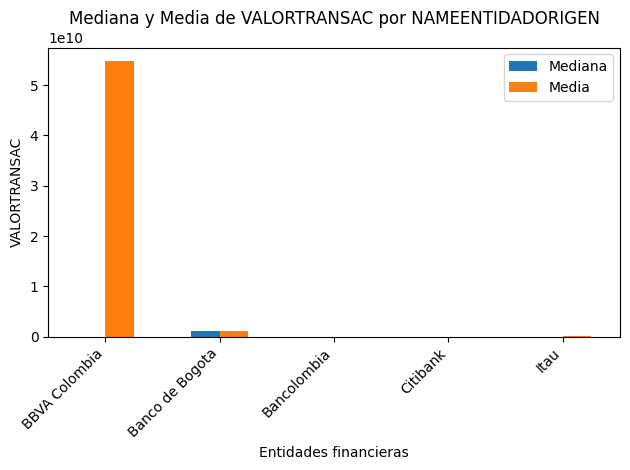

In [ ]:
# Graficar con seaborn
resultados = pd.DataFrame({'Mediana': mediana, 'Media': media})
plt.figure(figsize=(10, 6))
resultados.plot(kind='bar')
plt.title('Mediana y Media de VALORTRANSAC por NAMEENTIDADORIGEN')
plt.ylabel('VALORTRANSAC')
plt.xlabel('Entidades financieras')
plt.xticks(rotation=45, ha='right')  # Girar las etiquetas del eje x
plt.tight_layout()
plt.show()

**Analiss**

BBVA Colombia tiene una media extremadamente alta, mucho mayor que la mediana.

Esto indica que hay valores atípicos muy grandes que están inflando el promedio.

En contraste, Banco de Bogotá muestra valores más cercanos entre media y mediana, lo que indica una distribución más equilibrada de los valores transaccionales.

Otras entidades como Bancolombia, Citibank, e Itau tienen valores bajos tanto en media como en mediana, pero en algunos casos la media sigue siendo ligeramente mayor que la mediana, lo cual también sugiere posibles outliers (aunque mucho menores que en BBVA).

  NAMEENTIDADORIGEN          Moda
0     BBVA Colombia          0.00
1   Banco de Bogota 1117400000.00
2       Bancolombia          1.00
3          Citibank      19100.00
4              Itau          0.00


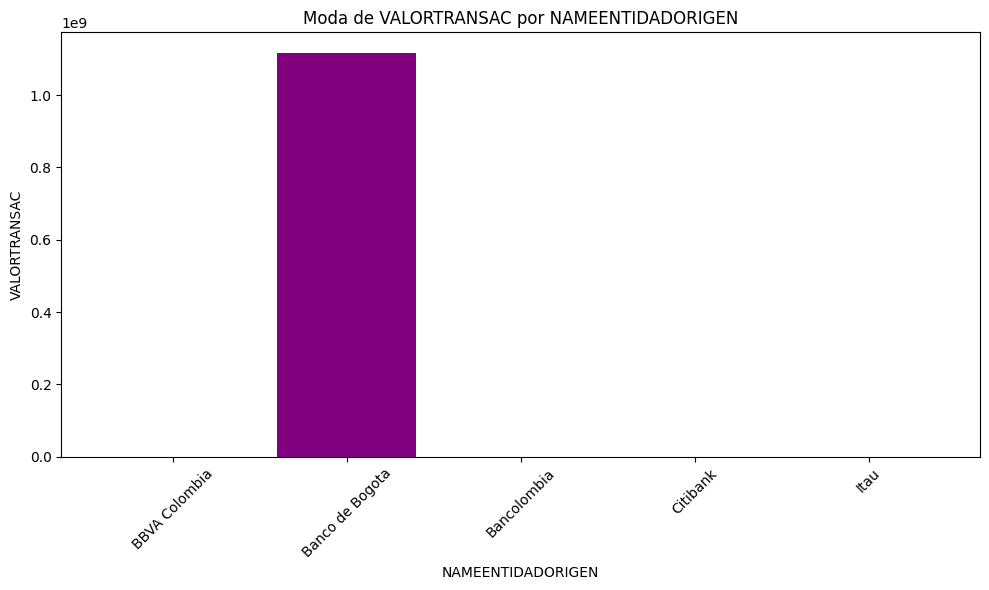

In [ ]:
# Calculo de la Moda
moda = df_housing.groupby('NAMEENTIDADORIGEN')['VALORTRANSAC'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
moda = moda.reset_index().rename(columns={'VALORTRANSAC': 'Moda'})
print(moda)
plt.figure(figsize=(10,6))
plt.bar(moda['NAMEENTIDADORIGEN'], moda['Moda'], color='purple')
plt.title('Moda de VALORTRANSAC por NAMEENTIDADORIGEN')
plt.xlabel('NAMEENTIDADORIGEN')
plt.ylabel('VALORTRANSAC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analisis**

Banco de Bogotá tiene una barra alta con un valor de moda cercano a 1.1e9 (1.100.000.000).

Esto indica que una transacción con ese valor específico se repite muchas veces en los datos de esa entidad.

Las demás entidades (BBVA, Bancolombia, Citibank, Itau) no tienen una moda destacable (barra nula o muy baja).

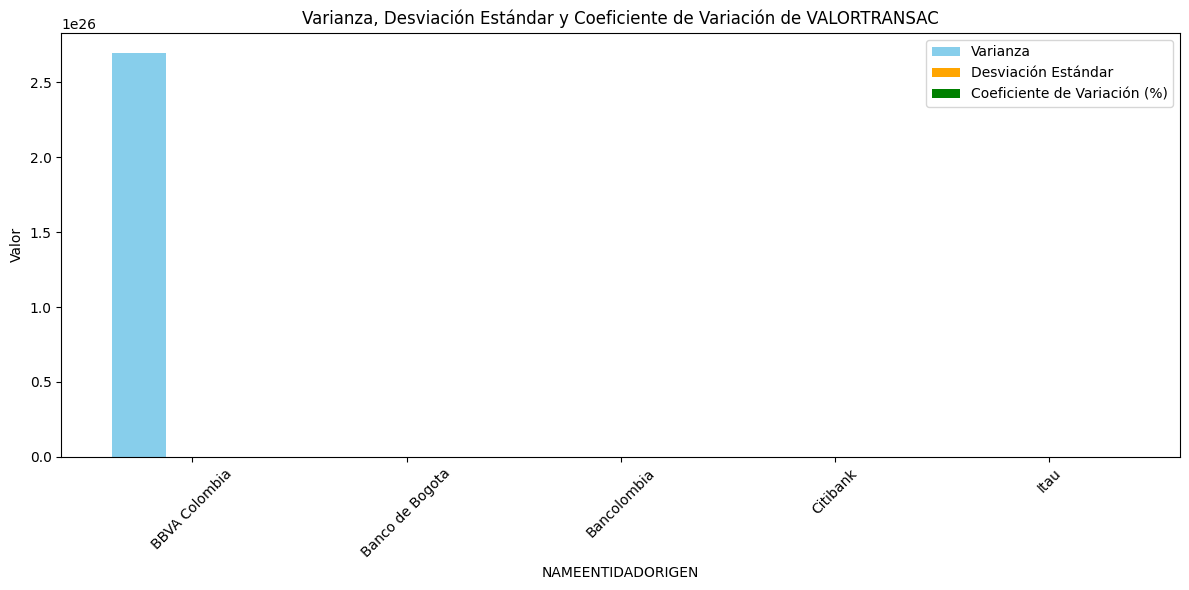

In [ ]:
# Calcular varianza, desviación estándar y coeficiente de variación
stats = df_housing.groupby('NAMEENTIDADORIGEN')['VALORTRANSAC'].agg([
    ('Varianza', 'var'),
    ('Desviación estándar', 'std'),
    ('Media', 'mean')
])

# Agregar columna de coeficiente de variación: (std / mean) * 100
stats['Coeficiente de variación (%)'] = (stats['Desviación estándar'] / stats['Media']) * 100

# Eliminar la columna de Media si solo quieres graficar los tres indicadores
stats = stats.drop(columns='Media')

# Reset index para poder graficar
stats = stats.reset_index()

# Gráfica
plt.figure(figsize=(12,6))
x = np.arange(len(stats['NAMEENTIDADORIGEN']))

# Ancho de las barras
width = 0.25

# Barras
plt.bar(x - width, stats['Varianza'], width=width, label='Varianza', color='skyblue')
plt.bar(x, stats['Desviación estándar'], width=width, label='Desviación Estándar', color='orange')
plt.bar(x + width, stats['Coeficiente de variación (%)'], width=width, label='Coeficiente de Variación (%)', color='green')

# Ejes y títulos
plt.xlabel('NAMEENTIDADORIGEN')
plt.ylabel('Valor')
plt.title('Varianza, Desviación Estándar y Coeficiente de Variación de VALORTRANSAC')
plt.xticks(x, stats['NAMEENTIDADORIGEN'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Analisis**

Si una entidad tiene alta varianza y desviación estándar, significa que sus transacciones varían mucho en monto.

Pero si su coeficiente de variación es bajo, quiere decir que esa variación es proporcionalmente baja respecto al valor medio. Es decir, la entidad tiene operaciones grandes, pero estables.

Por el contrario, si una entidad tiene un coeficiente de variación alto, sus montos son más impredecibles, aunque la media no sea tan alta.

Dado que el monto de BBVA esta muy alto, no se lograr ver la información de las otras variables, afectando un análisis más cuidadoso.


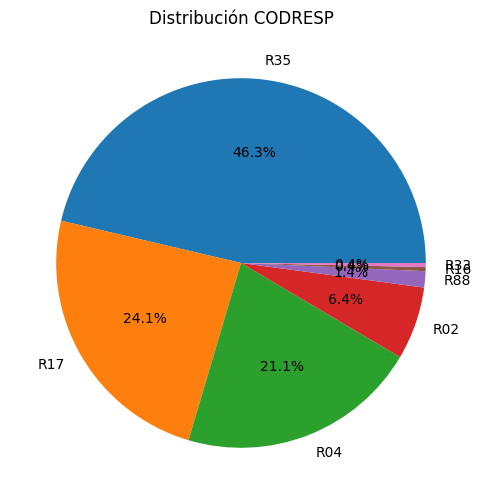

In [ ]:
# Gráfico circular (pie): Respuestas CODRESP
plt.figure(figsize=(6,6))
df_housing['CODRESP'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución CODRESP')
plt.ylabel('')
plt.show()



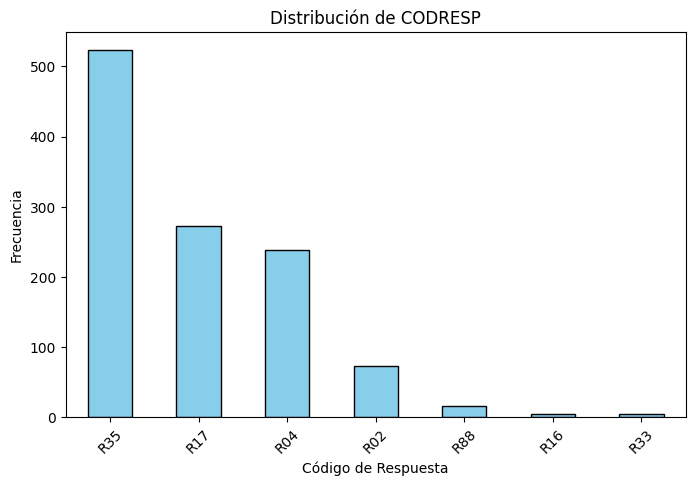

In [ ]:
plt.figure(figsize=(8,5))
df_housing['CODRESP'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de CODRESP')
plt.xlabel('Código de Respuesta')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

**Analisis**

R35 - Cuenta restringida (46.3%), Es el motivo de rechazo más frecuente. Indica que casi la mitad de las transacciones fallidas no se pudieron procesar porque la cuenta tenía restricciones.

R17 - Error de codificación (24.1%), El segundo más común. Se refiere a errores en el formato de la transacción o información mal digitada, lo cual requiere revisión manual. Esto podría apuntar a problemas en el origen del archivo o en la automatización del proceso.

R04 - No cuenta (21.1%), Indica que el número de cuenta no corresponde a ninguna cuenta activa. Esto sugiere errores en el ingreso del número de cuenta o que la cuenta fue cerrada sin actualizar los datos.

R02 - Cuenta cerrada (6.4%), Ocurre cuando el banco receptor ha cerrado la cuenta del destinatario. Puede ser por baja de cuenta o movimientos no autorizados previos.

Otros códigos (menor al 1.5% cada uno): Como R88, R16, R33, etc., son menos frecuentes, pero aún importantes, ya que indican situaciones específicas como cuentas congeladas, tipos de cuenta no válidos, o pagos parados.


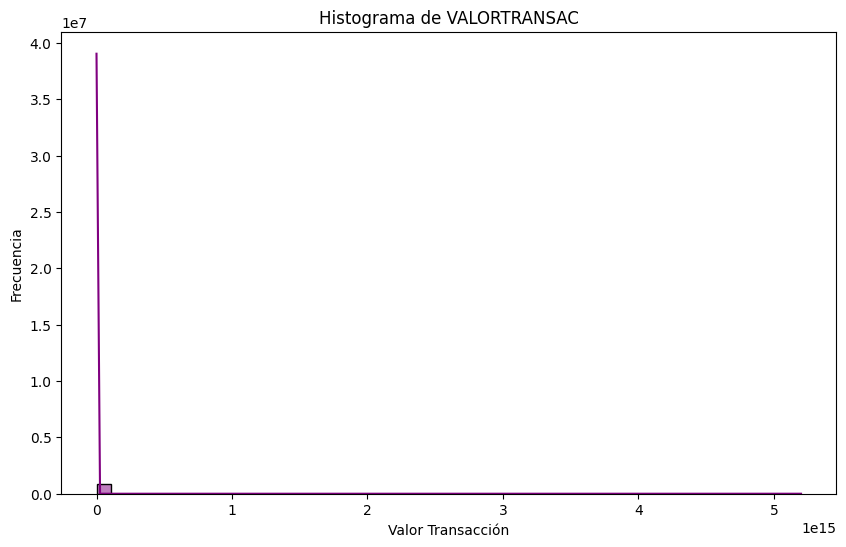

In [ ]:
# Histograma: VALORTRANSAC
plt.figure(figsize=(10,6))
sns.histplot(df_housing['VALORTRANSAC'], bins=50, kde=True, color='purple')
plt.title('Histograma de VALORTRANSAC')
plt.xlabel('Valor Transacción')
plt.ylabel('Frecuencia')
plt.show()

**Analisis**

Distribución extremadamente sesgada a la derecha (derechamente asimétrica):

Casi todas las transacciones se concentran en valores bajos (barras altas en la izquierda).

Posible presencia de valores atípicos o errores:

La escala del eje X llega hasta 5e15 (5 cuatrillones), lo cual no es un valor típico o realista en montos de transacciones bancarias.

Esto indica probablemente la presencia de datos erróneos, mal digitados o sin

limpieza, como por ejemplo:

Decimales mal colocados.

Códigos numéricos que no deberían estar en la columna de valor.

La visualización pierde detalle útil:

Dado que algunos pocos valores extremos elevan el rango, el resto de los datos se aplasta al borde izquierdo del gráfico.

Esto impide ver claramente cómo se distribuyen los montos reales y típicos.

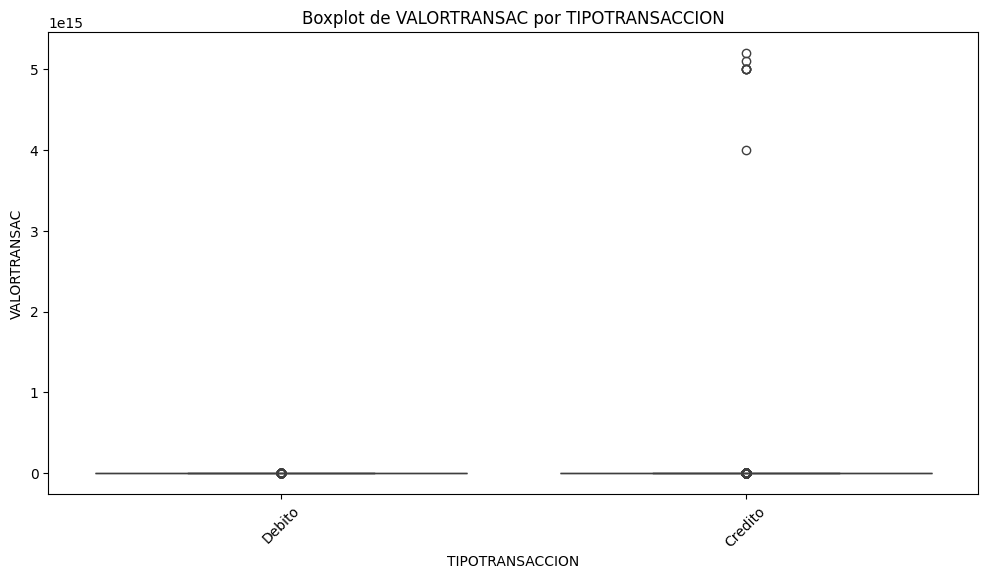

In [ ]:
# Boxplot: Comparar valores de transacción por tipo de transacción
plt.figure(figsize=(12,6))
sns.boxplot(x='TIPOTRANSACCION', y='VALORTRANSAC', data=df_housing)
plt.title('Boxplot de VALORTRANSAC por TIPOTRANSACCION')
plt.xticks(rotation=45)
plt.show()

**Analisis**

Presencia de valores atípicos extremadamente altos:

En ambas categorías (Débito y Crédito) se detectan valores fuera de rango normal, especialmente en Crédito, donde se observan puntos muy alejados del cuerpo principal de los datos (algunos > 5e15).

Estos valores inflan el eje Y, comprimiendo el resto de la información.

Valores atípicos más frecuentes y extremos en Créditos:

Hay varios puntos individuales por encima del bigote superior en Crédito, lo que sugiere un mayor número de transacciones erróneas, inusuales o extraordinarias.

En Débito, hay también Valores atípicos, pero parecen menos extremos.

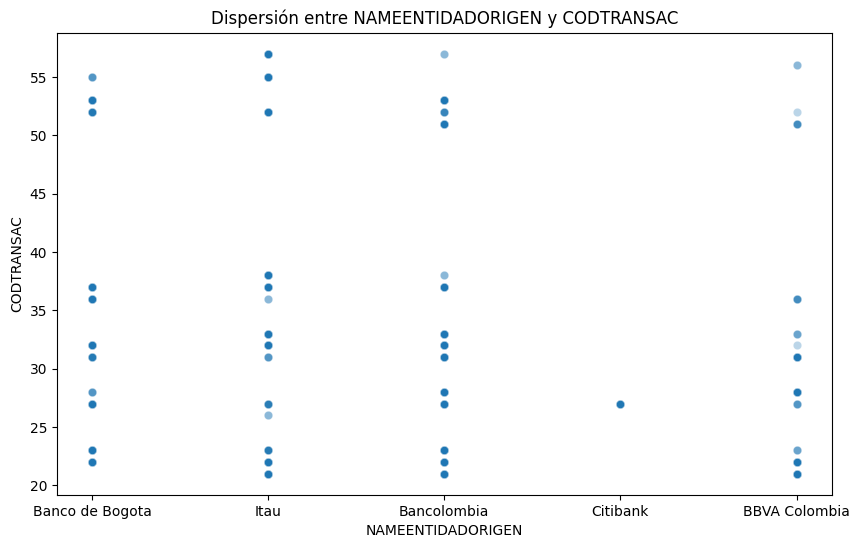

In [ ]:
# Scatterplot (dispersión): NAMEENTIDADORIGEN vs CODTRANSAC
plt.figure(figsize=(10,6))
sns.scatterplot(x='NAMEENTIDADORIGEN', y='CODTRANSAC', data=df_housing, alpha=0.3)
plt.title('Dispersión entre NAMEENTIDADORIGEN y CODTRANSAC')
plt.xlabel('NAMEENTIDADORIGEN')
plt.ylabel('CODTRANSAC')
plt.show()

**Analisis**

Diversidad de códigos por banco:

La mayoría de los bancos (Banco de Bogotá, Itaú, Bancolombia, BBVA) presentan una variedad de códigos de transacción, que parecen estar agrupados por rangos (ej. entre 20-40, 50-57).

Esto puede indicar que esas entidades realizan diversos tipos de operaciones. Citibank con menor variedad:

Se observa una sola transacción o muy pocas (CODTRANSAC = 27), lo que podría indicar:

Bajo volumen de operaciones en la data.

O una participación limitada a ciertos tipos de transacción.

Patrones comunes:

Algunos códigos de transacción como el 52, 55, 33, 23, 28 se repiten en varias entidades. Esto podría sugerir transacciones comunes o estándar entre entidades.

También se nota una agrupación en tres rangos principales: 20-30, 30-40 y 50-57

/tmp/ipython-input-3856369280.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped, x='Entidad_Transac', y='Cuenta', hue='CODRESP', ci=None)


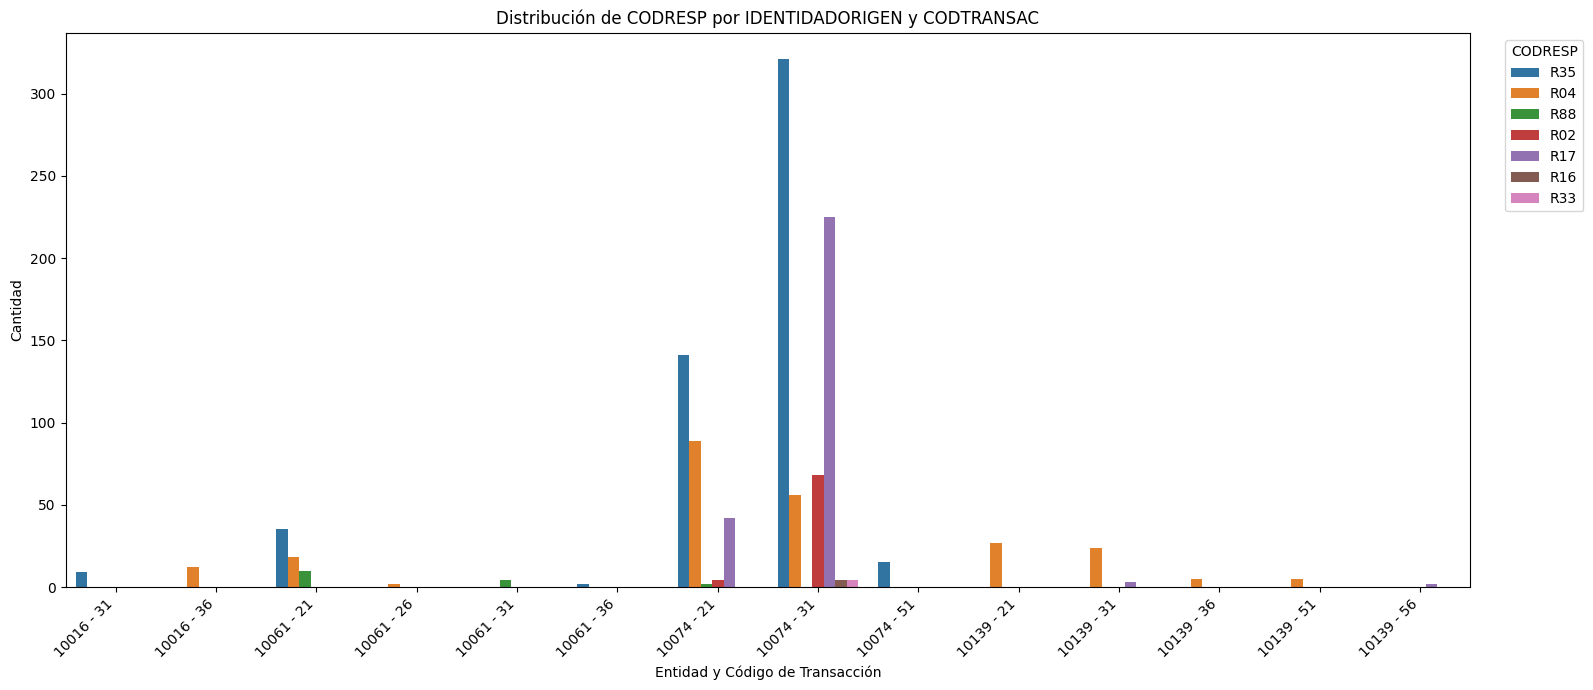

In [ ]:
# Agrupamos los datos
grouped = df_housing.groupby(['IDENTIDADORIGEN', 'CODTRANSAC', 'CODRESP']).size().reset_index(name='Cuenta')

# Crear una columna combinada para el eje X
grouped['Entidad_Transac'] = grouped['IDENTIDADORIGEN'].astype(str) + ' - ' + grouped['CODTRANSAC'].astype(str)

# Gráfico de barras
plt.figure(figsize=(16, 7))
sns.barplot(data=grouped, x='Entidad_Transac', y='Cuenta', hue='CODRESP', ci=None)

plt.title('Distribución de CODRESP por IDENTIDADORIGEN y CODTRANSAC')
plt.xlabel('Entidad y Código de Transacción')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='CODRESP', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Analisis**

Distribución desigual entre entidades:

Algunas entidades (Banco de Bogotá, Bancolombia, etc.) pueden tener muchas más transacciones que otras.

Esto puede indicar volúmenes operativos distintos entre las instituciones. Prevalencia de ciertos CODTRANSAC:

Es probable que ciertos códigos de transacción como 22 y 32 sean los más frecuentes.

Presencia de errores o respuestas particulares (CODRESP):

Si hay múltiples colores en una misma barra, indica que una misma combinación de entidad y transacción tiene distintos resultados.

Si una categoría específica de CODRESP predomina (por ejemplo, R04 o R35), puede ser un indicador de problemas frecuentes o rechazos en ciertas combinaciones.

Identificación de patrones de falla:

Por ejemplo, si Bancolombia - 22 tiene una gran cantidad de transacciones con

R04, se podría investigar qué está fallando con esa transacción específica en esa entidad.

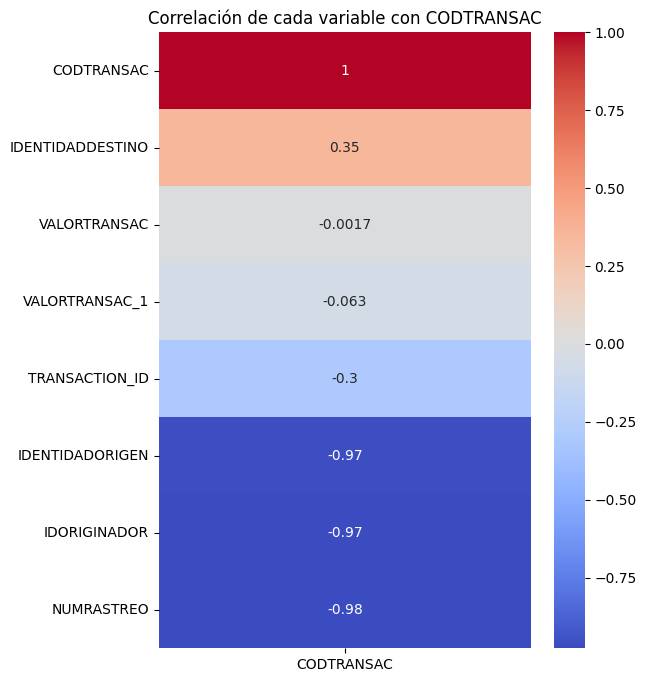

In [ ]:
# --- Filtrar solo columnas numéricas ---
numeric_df = df_housing.select_dtypes(include=['float64', 'int64'])

# --- Calcular matriz de correlación ---
corr_matrix = numeric_df.corr()

corr_with_codtransac = corr_matrix['CODTRANSAC'].sort_values(ascending=False)

plt.figure(figsize=(6, 8))
sns.heatmap(corr_with_codtransac.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlación de cada variable con CODTRANSAC")
plt.show()


**Analisis**

Alta correlación negativa con IDENTIDADORIGEN, IDORIGINADOR y NUMRASTREO (-0.97 a -0.98), Este hallazgo indica que, a medida que aumenta el código de transacción (CODTRANSAC), los valores de identificación del originador y el número de rastreo tienden a disminuir de forma consistente.

Correlación positiva moderada con IDENTIDADDESTINO (0.35), nos indica que algunas entidades destino pueden estar más asociadas con ciertos tipos de transacciones.

MÓDULO 4 — SELECCIÓN Y ENTRENAMIENTO DEL MODELO

Como este problema es de clasificación, entrenamos dos modelos:

Regresión logística (modelo base)

Random Forest (modelo robusto)

In [26]:
#Regresión logística
# === PREPROCESAMIENTO ===

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_housing['CODTRANSAC'] = le.fit_transform(df_housing['CODTRANSAC'])
df_housing['IDENTIDADORIGEN'] = le.fit_transform(df_housing['IDENTIDADORIGEN'])
df_housing['CODRESP'] = le.fit_transform(df_housing['CODRESP'])

# === SELECCIÓN DE VARIABLES ===
X = df_housing[['CODTRANSAC', 'IDENTIDADORIGEN']]
y = df_housing['CODRESP']

# === TRAIN TEST SPLIT ===
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === REGRESIÓN LOGÍSTICA ===
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

print("Modelo entrenado correctamente.")


Modelo entrenado correctamente.


In [24]:
df_housing.columns

Index(['TRANSACTION_ID', 'RANGOFECHA', 'CODTRANSAC', 'IDENTIDADDESTINO',
       'NAMEENTIDADDESTINO', 'IDENTIDADORIGEN', 'NAMEENTIDADORIGEN',
       'IDDESTINATARIO', 'CTADESTINO', 'NOMDESTINATARIO', 'VALORTRANSAC',
       'NUMRASTREO', 'CODRESP', 'VALORTRANSAC_1', 'TIPOTRANSACCION',
       'IDORIGINADOR', 'DATAADDITIONAL', 'NAMEORIGINADOR', 'OBSERVACION',
       'VALORTRANSAC_scaled'],
      dtype='object')